In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data_bmw = pd.read_csv('Transition_thermique_electrique_2010_2024.csv')

In [19]:
data_bmw.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [20]:
data_bmw.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [21]:
# Sélection 5% des lignes au hasard
# n_missing = int(0.05 * len(data_bmw))
# missing_indices_fuel = np.random.choice(data_bmw.index, n_missing, replace=False)

# Mettre certains type d'énergie à NaN
# data_bmw.loc[missing_indices_fuel, 'Fuel_Type'] = np.nan

# missing_indices_sales = np.random.choice(data_bmw.index, n_missing, replace=False)
# data_bmw.loc[missing_indices_sales, 'Sales_Volume'] = np.nan

In [22]:
# n_duplicates = 200

# duplicates = data_bmw.sample(n_duplicates, random_state=42)

# data_bmw = pd.concat([data_bmw, duplicates], ignore_index=True)

# Mélange aléatoire pour disperser les doublons dans le dataset
# data_bmw = data_bmw.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
data_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


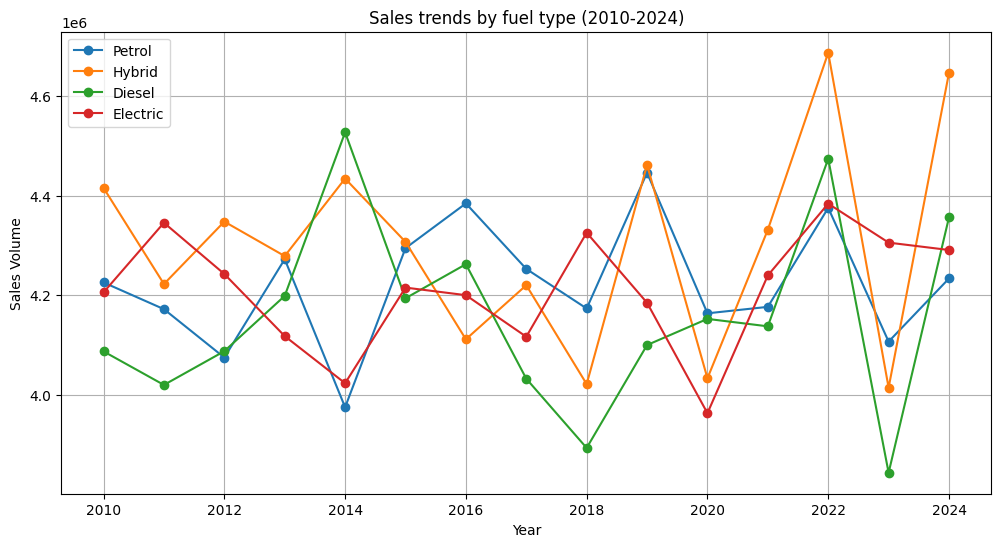

In [24]:
# Evolution des ventes par type d'énergie au fil des ans
plt.figure(figsize=(12, 6))
for fuel_type in data_bmw['Fuel_Type'].dropna().unique():
    subset = data_bmw[data_bmw['Fuel_Type'] == fuel_type]
    yearly_sales = subset.groupby('Year')['Sales_Volume'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label=fuel_type)
plt.title('Sales trends by fuel type (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Ratio electrique/thermique et electrique+hybride/thermique
sales_over_time = data_bmw.pivot_table(index='Year', columns='Fuel_Type', values='Sales_Volume', aggfunc='sum')
sales_over_time['Electric_to_Thermal_Ratio'] = sales_over_time['Electric'] / (sales_over_time['Diesel'] + sales_over_time['Petrol'])
sales_over_time['Electric_Hybrid_to_Thermal_Ratio'] = (sales_over_time['Electric'] + sales_over_time['Hybrid']) / (sales_over_time['Diesel'] + sales_over_time['Petrol'])
print(sales_over_time)

Fuel_Type   Diesel  Electric   Hybrid   Petrol  Electric_to_Thermal_Ratio  \
Year                                                                        
2010       4086808   4205554  4415611  4225472                   0.505945   
2011       4019361   4345538  4222305  4171737                   0.530520   
2012       4087221   4242466  4347806  4074402                   0.519807   
2013       4198426   4117556  4278494  4272257                   0.486095   
2014       4527336   4022785  4434340  3974499                   0.473167   
2015       4193633   4215113  4307029  4294432                   0.496593   
2016       4262129   4199882  4111145  4384394                   0.485731   
2017       4031905   4116302  4219927  4252677                   0.496863   
2018       3892638   4325544  4021011  4173080                   0.536288   
2019       4099576   4184558  4461759  4446063                   0.489672   
2020       4152177   3962571  4032718  4163377                   0.476525   

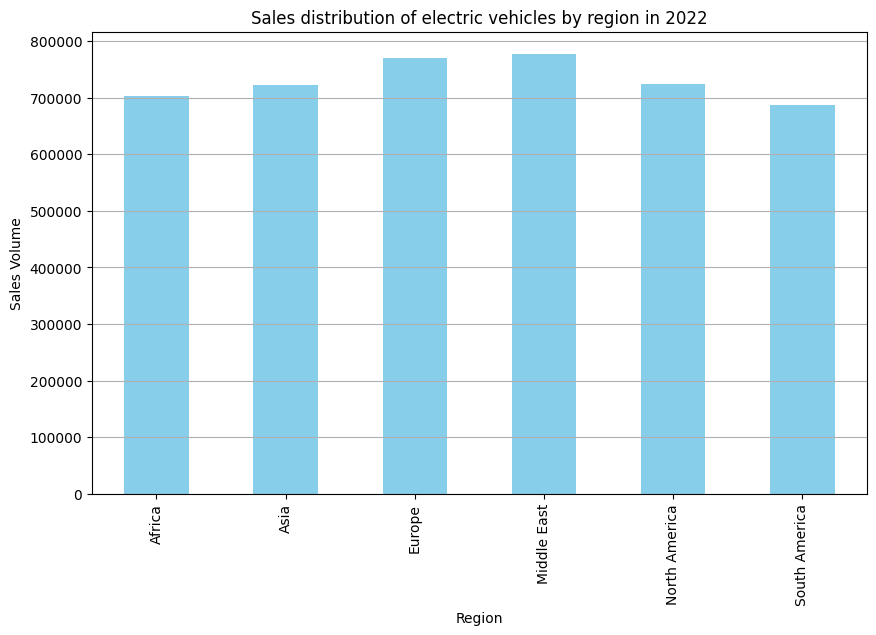

In [26]:
# Répartition des ventes électriques par région en 2022
plt.figure(figsize=(10, 6))
subset_2022 = data_bmw[(data_bmw['Year'] == 2022) & (data_bmw['Fuel_Type'] == 'Electric')]
region_sales = subset_2022.groupby('Region')['Sales_Volume'].sum()
region_sales.plot(kind='bar', color='skyblue')
plt.title('Sales distribution of electric vehicles by region in 2022')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.grid(axis='y')
plt.show()

Model
3 Series    75106.817084
5 Series    75742.721831
7 Series    76921.042440
M3          75254.638434
M5          74207.161804
X1          75736.980558
X3          76157.657449
X5          74631.648649
X6          74507.635791
i3          74824.403339
i8          74921.356771
Name: Price_USD, dtype: float64


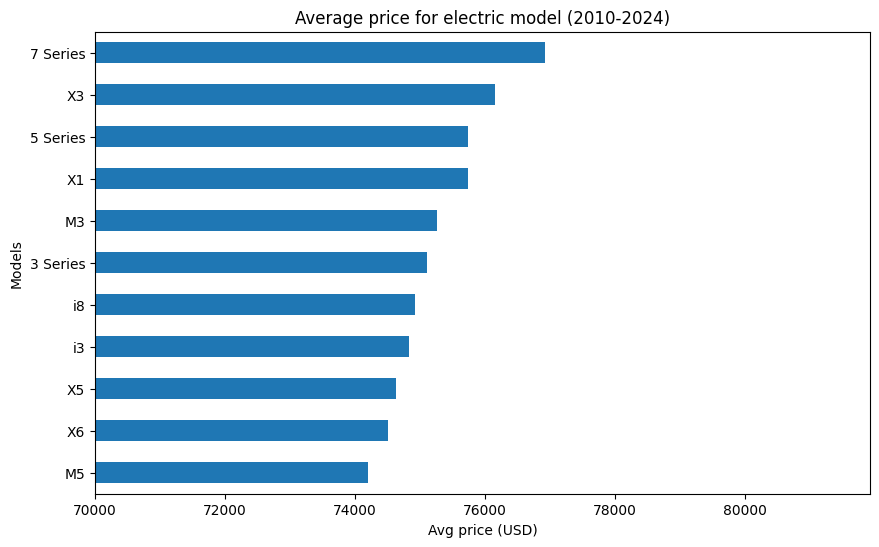

In [27]:
# Prix moyen par modèle électrique
average_price_electric = data_bmw[data_bmw['Fuel_Type'] == 'Electric'].groupby('Model')['Price_USD'].mean()
print(average_price_electric)

# Visualisation du prix moyen par modèle électrique avec l'échelle des prix qui démarre à 70000
plt.figure(figsize=(10, 6))
average_price_electric.sort_values().plot.barh()
plt.title('Average price for electric model (2010-2024)')
plt.xlabel('Avg price (USD)')
plt.xlim(70000, average_price_electric.max() + 5000)
plt.ylabel('Models')
plt.show()


Market Share 2010:
 Fuel_Type
Diesel      24.134534
Electric    24.835785
Hybrid      26.076271
Petrol      24.953410
Name: Sales_Volume, dtype: float64
Market Share 2024:
 Fuel_Type
Diesel      24.854583
Electric    24.479323
Hybrid      26.513200
Petrol      24.152894
Name: Sales_Volume, dtype: float64


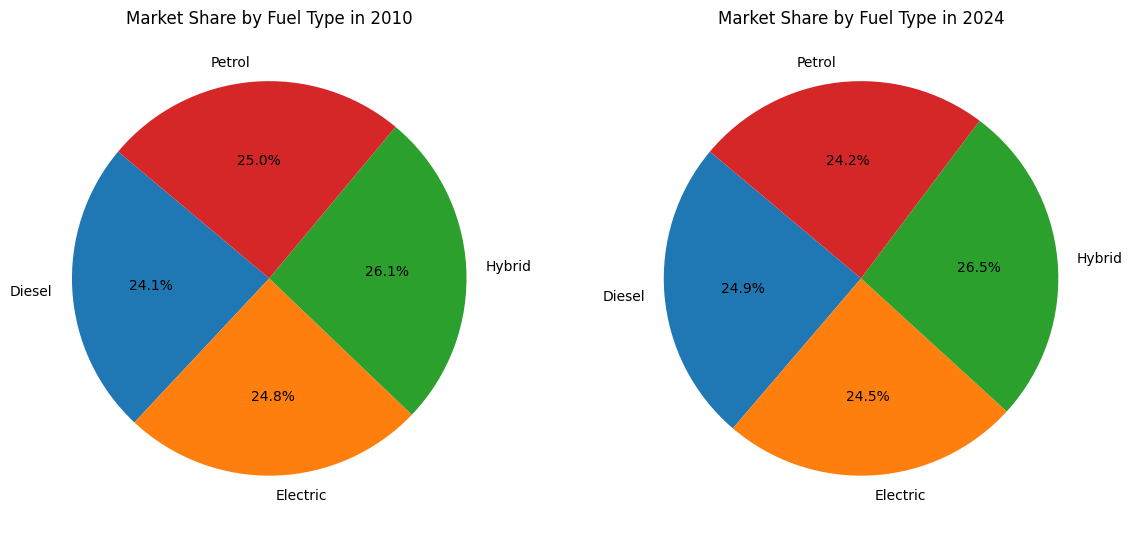

In [28]:
# Part de marché des types d'énergie en 2010 et 2024
market_share_2010 = data_bmw[data_bmw['Year'] == 2010].groupby('Fuel_Type')['Sales_Volume'].sum()
market_share_2024 = data_bmw[data_bmw['Year'] == 2024].groupby('Fuel_Type')['Sales_Volume'].sum()
market_share_2010 = market_share_2010 / market_share_2010.sum() * 100
market_share_2024 = market_share_2024 / market_share_2024.sum() * 100
print("Market Share 2010:\n", market_share_2010)
print("Market Share 2024:\n", market_share_2024)
# Visualisation de la part de marché des types d'énergie en 2010 et 2024
labels_2010 = market_share_2010.index
sizes_2010 = market_share_2010.values
labels_2024 = market_share_2024.index
sizes_2024 = market_share_2024.values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.pie(sizes_2010, labels=labels_2010, autopct='%1.1f%%', startangle=140)
ax1.set_title('Market Share by Fuel Type in 2010')
ax2.pie(sizes_2024, labels=labels_2024, autopct='%1.1f%%', startangle=140)
ax2.set_title('Market Share by Fuel Type in 2024')
plt.show()


Fuel_Type        Diesel  Electric    Hybrid    Petrol
Region                                               
Africa         10211670  10329085  10486034  10538463
Asia           10492033  10596850  11422396  10462998
Europe         10406133  10590064  10825662  10733279
Middle East    10491957  10395195  10627320  10812148
North America  10259904  10861198  10808682  10472845
South America  10500121  10385273  10362003  10304421


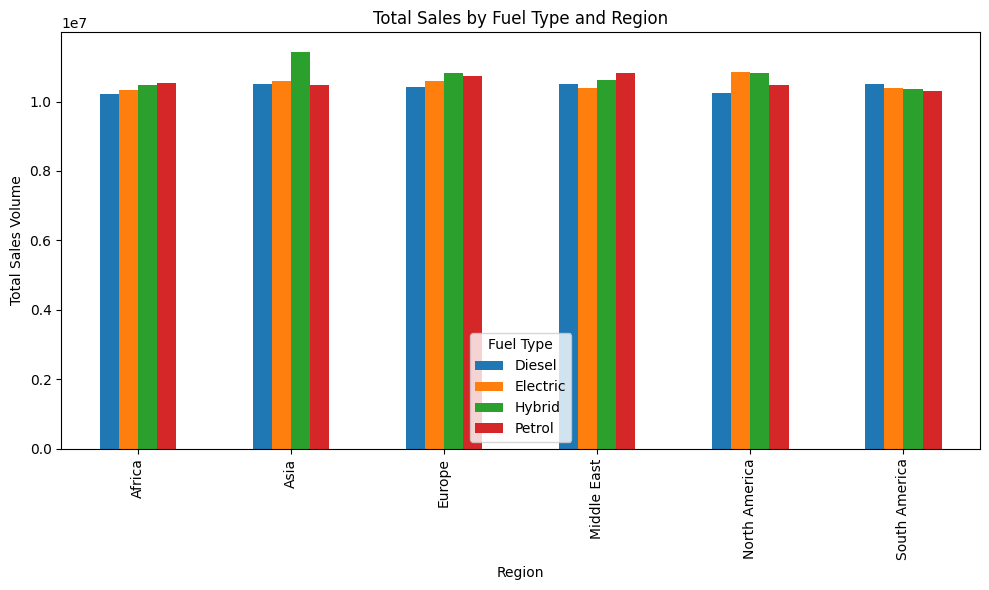

In [29]:
# Les types d'énergie les plus vendus par région
total_sales_by_region_and_fuel = data_bmw.groupby(['Region', 'Fuel_Type'])['Sales_Volume'].sum().unstack()
print(total_sales_by_region_and_fuel)

# Visualisation des ventes totales par type d’énergie et par région
total_sales_by_region_and_fuel.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Fuel Type and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

Fuel_Type
Diesel      75079.809671
Electric    75276.313207
Hybrid      74797.551746
Petrol      74990.419841
Name: Price_USD, dtype: float64


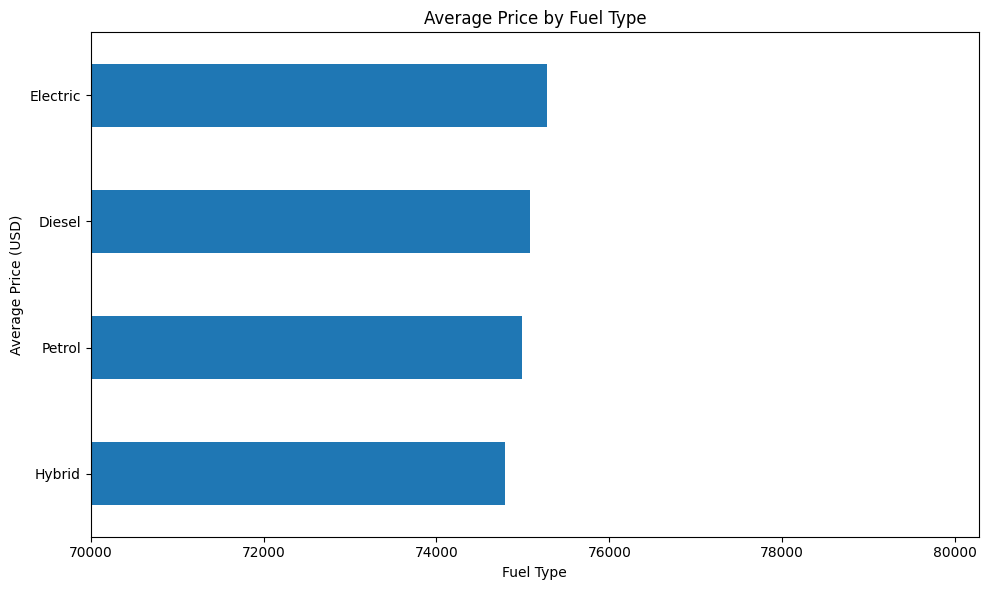

In [30]:
# Prix moyen par type d’énergie
average_price_by_fuel_type = data_bmw.groupby('Fuel_Type')['Price_USD'].mean()
print(average_price_by_fuel_type)

# Visualisation du prix moyen par type d’énergie
plt.figure(figsize=(10, 6))
average_price_by_fuel_type.sort_values().plot.barh()
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.xlim(70000, average_price_by_fuel_type.max() + 5000)
plt.ylabel('Average Price (USD)')
plt.tight_layout()
plt.show()

In [31]:
# Quel est le modèle le plus vendu au total
total_sales_by_model = data_bmw.groupby('Model')['Sales_Volume'].sum()
most_sold_model = total_sales_by_model.idxmax()
print(f"The most sold model is {most_sold_model} with {total_sales_by_model.max()} units sold.")

The most sold model is 7 Series with 23786466 units sold.
